# Importing Libraries

In [1]:
#library to use pd and np
#library to use plt
import pandas as pd
import glob
import numpy as np
import operator
import matplotlib.pyplot as plt


# Data Gathering

In [2]:
#Data Imports. Paths should be changed based on the folder location of the csv files.
female = pd.read_csv(r"C:\Users\admin\Desktop\Python\DATAFinalProject\data female.csv")
male = pd.read_csv(r'C:\Users\admin\Desktop\Python\DATAFinalProject\data male.csv')
cancer = pd.read_csv(r"C:\Users\admin\Desktop\Python\DATAFinalProject\data all.csv")

#Places each gathered age csv into a list.
path = r'C:\Users\admin\Desktop\Python\DATA' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

In [3]:
frame = pd.concat(li, axis=0, ignore_index=True) 
frame.drop(["Number","Cum. risk**"],axis=1,inplace=True) #Removes Uncessary columns inside the data set.
frame
#combined datasets from the list into a single data set.

,ICD,Cancer,Uncertainty interval,Crude Rate*,ASR (World)*
0,Allcancersexcl.non-melanomaskincancer,2497,11.30,11.60,0.11
1,Leukaemia,1340,6.10,6.20,0.06
2,"Brain,centralnervoussystem",267,1.20,1.20,0.01
3,Non-Hodgkinlymphoma,150,0.68,0.67,0.01
4,Kidney,117,0.53,0.58,0.01
...,...,...,...,...,...
256,Hodgkinlymphoma,43,1.20,1.30,-
257,Vagina,26,1.20,1.20,-
258,Penis,23,1.70,1.80,-
259,Mesothelioma,20,0.56,0.60,-


# Data Cleansing


In [4]:
#Removes redundant and unusable data from the dataset.
for x in range(len(li)):
    li[x].drop("C00-97/C44" , axis=0, inplace=True)
    li[x].drop(["Number","Cum. risk**","Uncertainty interval","Crude Rate*","ASR (World)*"],axis=1,inplace=True)
    li[x] = li[x].rename(columns={'Cancer': 'Cases', 'ICD': 'Type of Cancer'})
    
male.drop(["Number","Cum. risk**","Uncertainty interval","Crude Rate*","ASR (World)*"],axis=1,inplace=True)
male.drop("C00-97/C44", axis=0, inplace=True)
male = male.rename(columns={'Cancer':'Cases','ICD': 'Type of Cancer'})

female.drop(["Number","Cum. risk**","Uncertainty interval","Crude Rate*","ASR (World)*"],axis=1,inplace=True)
female.drop("C00-97/C44", axis=0, inplace=True)
female = female.rename(columns={'Cancer':'Cases','ICD': 'Type of Cancer'})

cancer.drop(["Number","Cum. risk**","Uncertainty interval","Crude Rate*","ASR (World)*"],axis=1,inplace=True)
cancer.drop("C00-97/C44", axis=0, inplace=True)
cancer = cancer.rename(columns={'Cancer':'Cases','ICD': 'Cancer'})

# Exploratory Data Analysis

In [5]:
for x in range(len(li)):
    print(li[x])
    
#Lists all of the Datasets inside the list.

                         Type of Cancer  Cases
C91-95                        Leukaemia   1340
C70-72       Brain,centralnervoussystem    267
C82-86, C96         Non-Hodgkinlymphoma    150
C64-65                           Kidney    117
C22                               Liver     73
C62                              Testis     46
C56                               Ovary     16
C81                     Hodgkinlymphoma     16
C07-08                   Salivaryglands      8
C73                             Thyroid      5
C33-34                             Lung      4
C67                             Bladder      4
C51                               Vulva      4
C19-20                           Rectum      3
C54                         Corpusuteri      3
C43                      Melanomaofskin      3
C25                            Pancreas      2
C52                              Vagina      2
C18                               Colon      1
C32                              Larynx      1
             

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

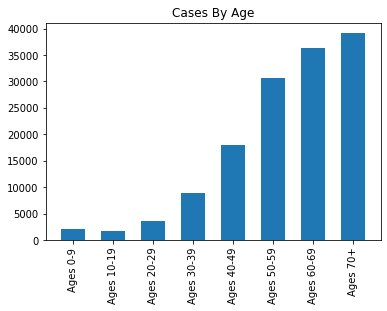

In [6]:
#Inputs the sum of cases for each age bracket into a dictionary.
age0_9 = li[0]["Cases"].sum(axis = 0, skipna = True)
age10_19 = li[1]["Cases"].sum(axis = 0, skipna = True)
age20_29 = li[2]["Cases"].sum(axis = 0, skipna = True)
age30_39 = li[3]["Cases"].sum(axis = 0, skipna = True)
age40_49 = li[4]["Cases"].sum(axis = 0, skipna = True)
age50_59 = li[5]["Cases"].sum(axis = 0, skipna = True)
age60_69 = li[6]["Cases"].sum(axis = 0, skipna = True)
age70_up = li[7]["Cases"].sum(axis = 0, skipna = True)

totalCases = {"Ages 0-9":age0_9, "Ages 10-19" : age10_19,
              "Ages 20-29":age20_29, "Ages 30-39":age30_39,
              "Ages 40-49":age40_49, "Ages 50-59" : age50_59,
              "Ages 60-69":age60_69, "Ages 70+":age70_up, 
             }

#Plots the data using bars.
plt.title("Cases By Age")
keys = totalCases.keys()
values = totalCases.values()
plt.bar(keys, values, width=0.6)
plt.xticks(rotation=90, horizontalalignment="center")

In [7]:
#Finds the highest number of cases of a specific age group in the dictionary.
maxCases = max(totalCases.items(), key=operator.itemgetter(1))[0]
print("The Age group that cancer is most prominent is those " + maxCases)

The Age group that cancer is most prominent is those Ages 70+


<BarContainer object of 2 artists>

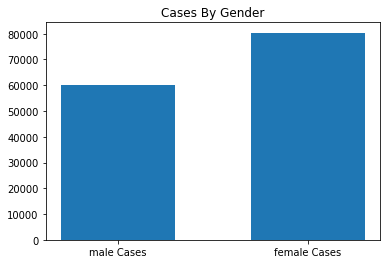

In [8]:
bothGenderCases = {"male Cases" : male["Cases"].sum(axis = 0, skipna = True),
                    "female Cases" : female["Cases"].sum(axis = 0, skipna = True)}

plt.title("Cases By Gender")
keys1 = bothGenderCases.keys()
values1 = bothGenderCases.values()
plt.bar(keys1, values1, width=0.6)


In [9]:
maxGenderCases = max(bothGenderCases.items(), key=operator.itemgetter(1))[0]
print("The gender with the more prominent cancer cases is " + maxGenderCases)

The gender with the more prominent cancer cases is female Cases


In [10]:
cancer.head()

,Cancer,Cases
C50,Breast,27163
C33-34,Lung,19180
C18,Colon,11315
C22,Liver,10594
C61,Prostate,8242


In [11]:
#Finds the sum of all the cases of cancer.
allcases = { "CancerCases" :cancer ["Cases"].sum(axis = 0, skipna = True),}
print("The total cases of cancer in the Phillipines is ", allcases["CancerCases"])

The total cases of cancer in the Phillipines is  140639


Text(0, 0.5, 'Cancer Cases')

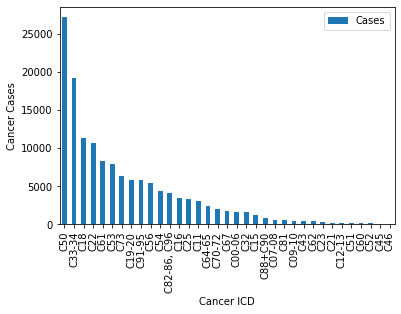

In [12]:
#Plots the bar graph for the number of cases of cancer for each cancer.
cancer.plot.bar()
plt.xlabel("Cancer ICD")
plt.ylabel("Cancer Cases")

In [13]:
highestCases = cancer['Cases'].max()
print("The Highest cases of cancer in the Phillipines is ",cancer['Cancer'].iloc[0], " Cancer with ", highestCases, "Cases")


The Highest cases of cancer in the Phillipines is  Breast  Cancer with  27163 Cases


# Modelling


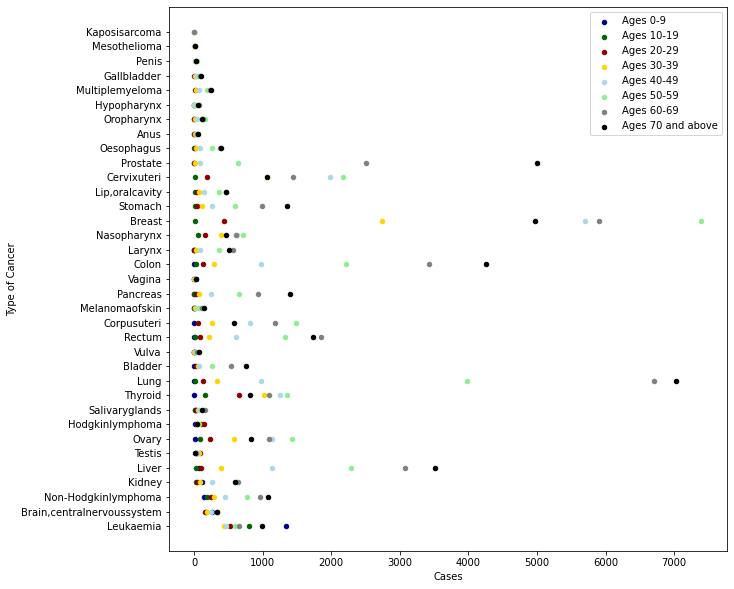

In [14]:
#Scatter plot model of the most prominent type of cancer based on age.
plt.rcParams["figure.figsize"]=(10,10)

ax = li[0].plot(kind='scatter', x='Cases', y='Type of Cancer',
                color='DarkBlue', label='Ages 0-9');
li[1].plot(kind='scatter', x='Cases', y='Type of Cancer', 
           color='DarkGreen', label='Ages 10-19', ax=ax);
li[2].plot(kind='scatter', x='Cases', y='Type of Cancer', 
           color='DarkRed', label='Ages 20-29', ax=ax);
li[3].plot(kind='scatter', x='Cases', y='Type of Cancer', 
           color='Gold', label='Ages 30-39', ax=ax);
li[4].plot(kind='scatter', x='Cases', y='Type of Cancer', 
           color='LightBlue', label='Ages 40-49', ax=ax);
li[5].plot(kind='scatter', x='Cases', y='Type of Cancer', 
           color='LightGreen', label='Ages 50-59', ax=ax);
li[6].plot(kind='scatter', x='Cases', y='Type of Cancer', 
           color='Grey', label='Ages 60-69', ax=ax);
li[7].plot(kind='scatter', x='Cases', y='Type of Cancer', 
           color='Black', label='Ages 70 and above', ax=ax);

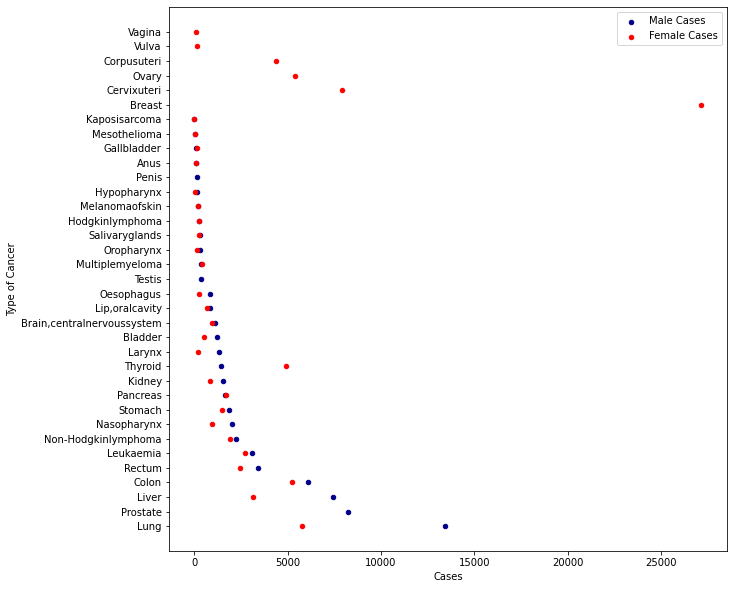

In [15]:
ax2 = male.plot(kind='scatter', x='Cases', y='Type of Cancer',
                color='DarkBlue', label='Male Cases');
female.plot(kind='scatter', x='Cases', y='Type of Cancer', 
           color='Red', label='Female Cases', ax=ax2);

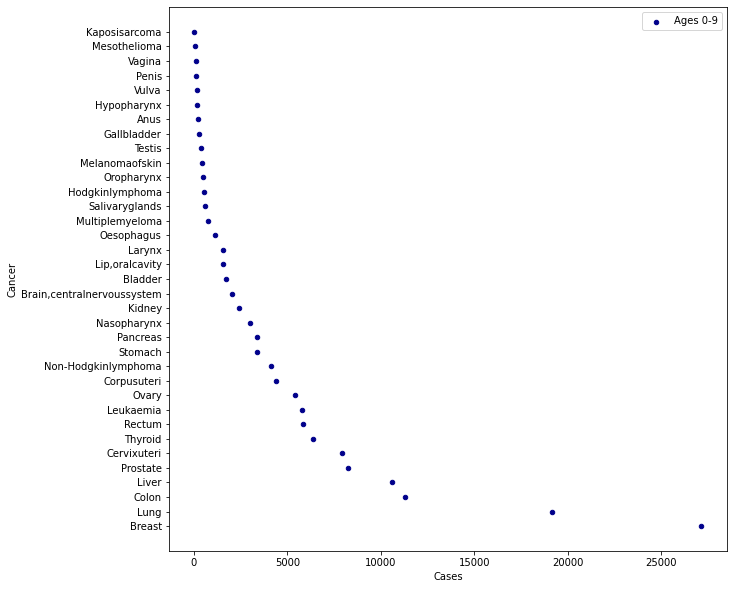

In [16]:
cancer.plot(kind='scatter', x='Cases', y='Cancer',
                color='DarkBlue', label='Ages 0-9');

# Evaluation

In [17]:
maxCases = max(totalCases.items(), key=operator.itemgetter(1))[0]
print("The age group that cancer is most prominent is those " + maxCases)

maxGenderCases = max(bothGenderCases.items(), key=operator.itemgetter(1))[0]
print("The gender with the more prominent cancer cases is " + maxGenderCases)

allcases = { "CancerCases" :cancer ["Cases"].sum(axis = 0, skipna = True),}
print("The total cancer cases in the phillipines is", allcases["CancerCases"])

highestCases = cancer['Cases'].max()
print("The highest cases of cancer in the Phillipines is ",cancer['Cancer'].iloc[0], " Cancer with ", highestCases, "Cases")



The age group that cancer is most prominent is those Ages 70+
The gender with the more prominent cancer cases is female Cases
The total cancer cases in the phillipines is 140639
The highest cases of cancer in the Phillipines is  Breast  Cancer with  27163 Cases
